In [1]:
import sys
sys.path.append("..")

In [2]:
from math import nan
from pathlib import Path
from wandb_utils import Metrics, load_data, plot, simple_concat
from wandb_downloader import RunsDownloader

In [8]:
results_dir = Path("../../results/cmnist/2v4/subsampled-0.66cont/")

data = load_data(
    results_dir / "ranking-fdm.simplified.strong_subs.subsampled.csv",
    results_dir / "kmeans-fdm.simplified.strong_subs.subsampled.csv",
    results_dir / "no-cluster-fdm.simplified.strong_subs.subsampled.csv",
    results_dir / "perfect-cluster.simplified.strong_subs.subsampled.csv",
    results_dir / "cmnist_baseline_cnn_color_60epochs.csv",
#     results_dir / "cmnist_baseline_dro_color_eta_0.1_60epochs.csv",
    results_dir / "cmnist_baseline_gdro_color_60epochs.csv",
    results_dir / "cmnist_baseline_lff_color_60epochs.csv",
)

In [9]:
wandb = RunsDownloader(project="fdm-hydra")
data_ = wandb.groups("ranking-fdm.overcluster8.subsampled", "kmeans-fdm-8.overcluster8.subsampled")
data = simple_concat(data, data_)

'ranking-fdm.overcluster8.subsampled': found 30 runs.
'kmeans-fdm-8.overcluster8.subsampled': found 30 runs.


In [12]:
plot_kwargs = dict(
    file_format="pdf",
    fig_dim=(5, 2.0),
    file_prefix="cmnist_2v4_partial_overcluster",
)

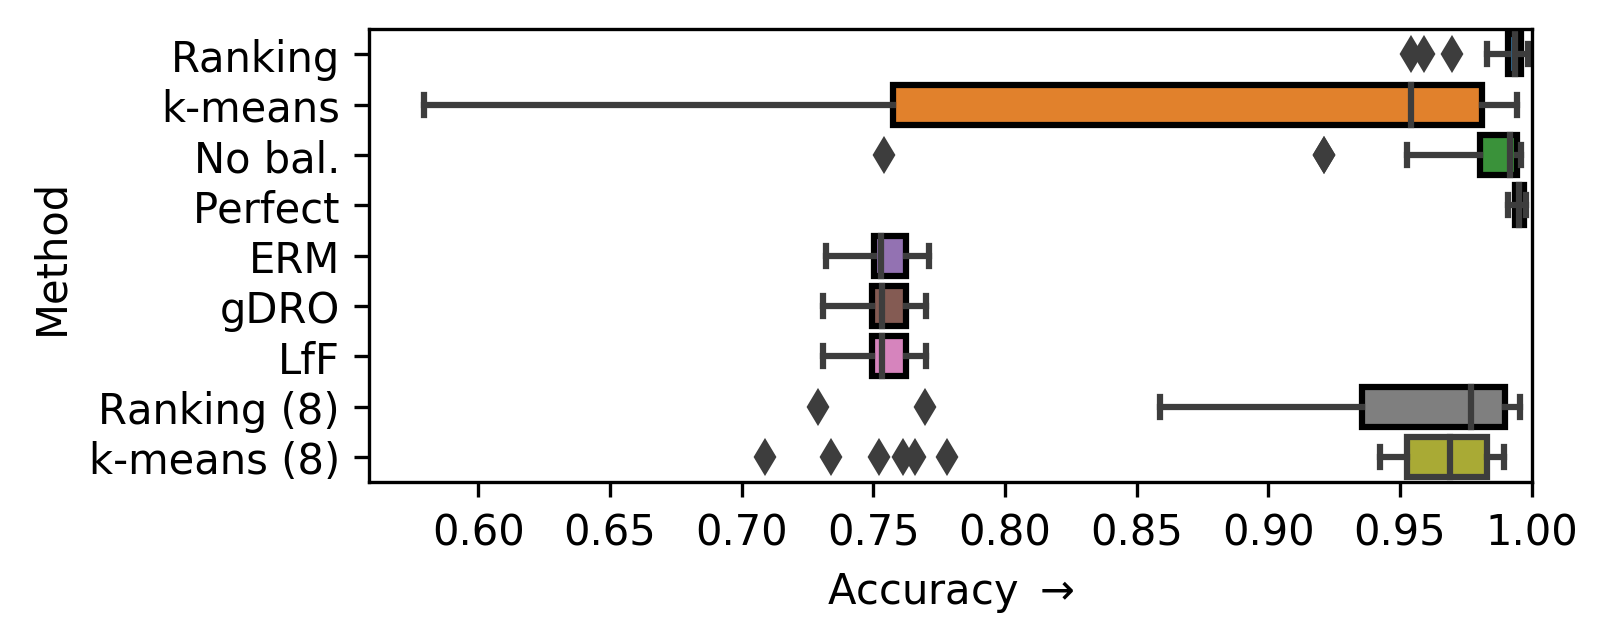

In [13]:
plot(data, metrics=[Metrics.acc], x_limits=(nan, 1), **plot_kwargs)

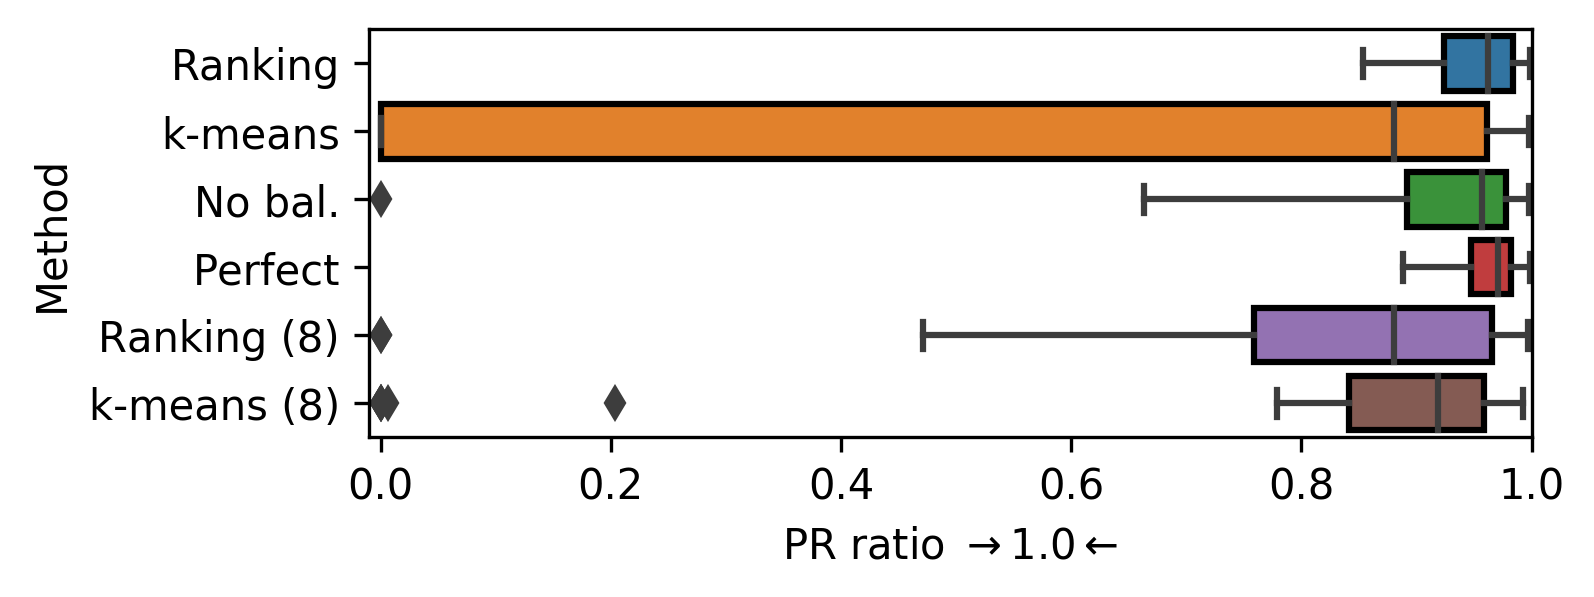

In [7]:
plot(data, metrics=[Metrics.prr], x_limits=(-0.01, 1), **plot_kwargs)

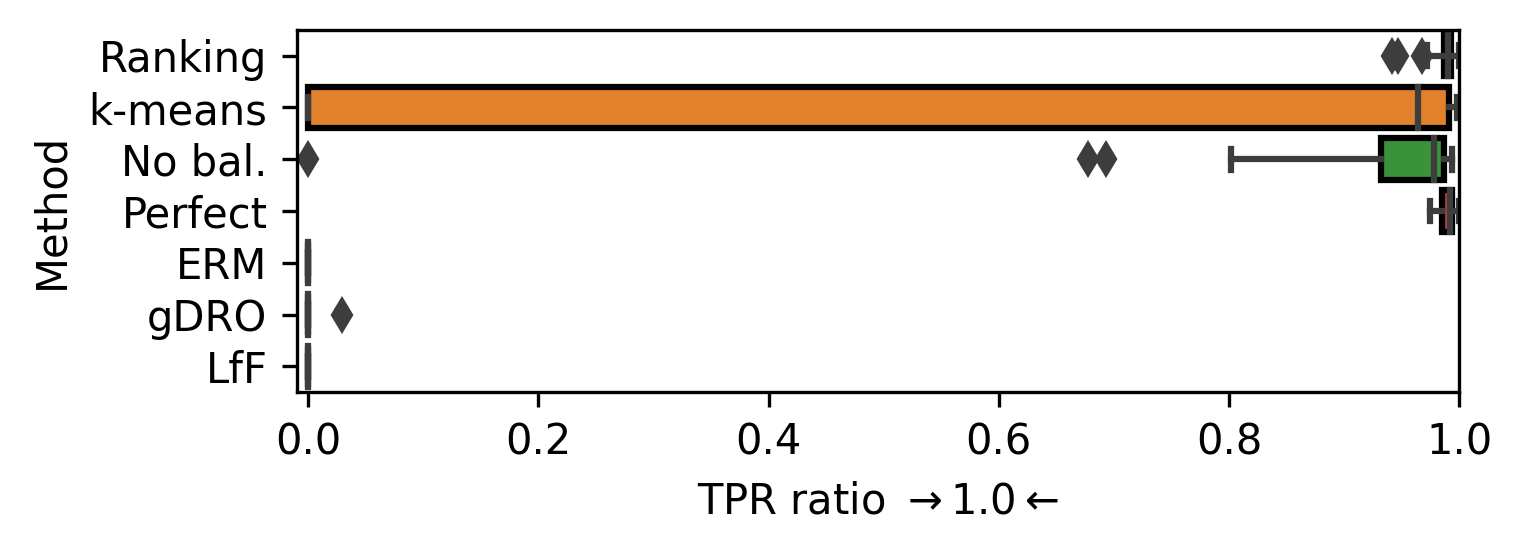

In [12]:
plot(data, metrics=[Metrics.tpr], x_limits=(-0.01, 1), **plot_kwargs)

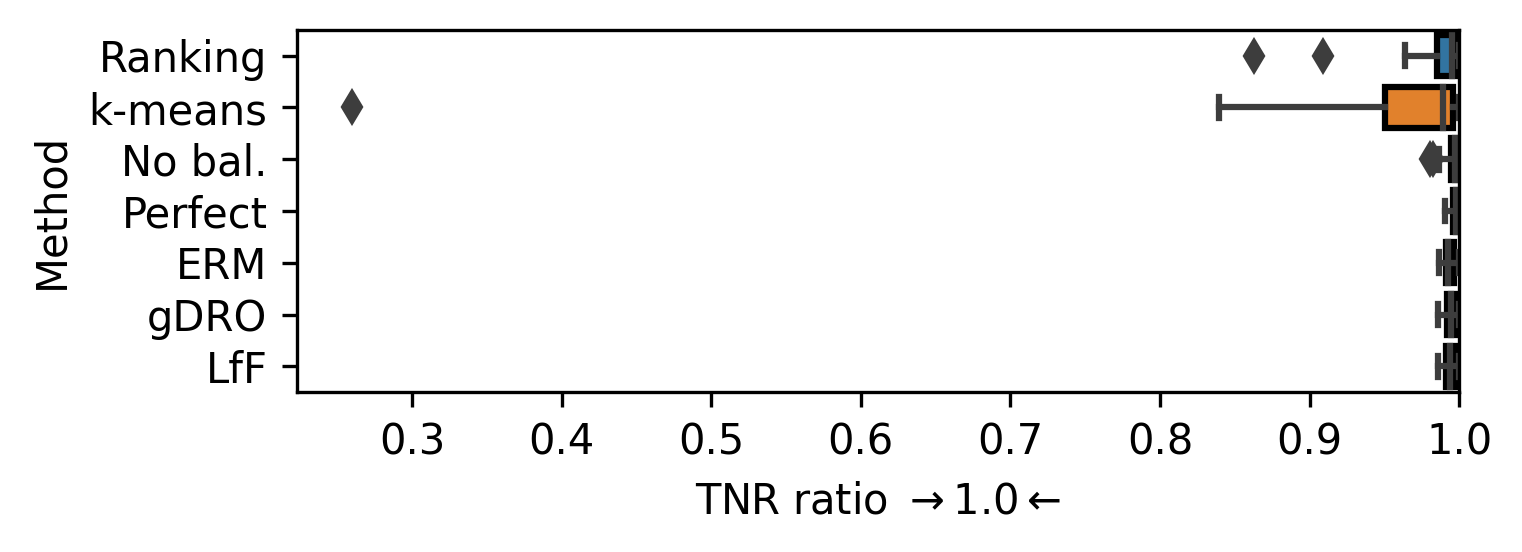

In [13]:
plot(data, metrics=[Metrics.tnr], x_limits=(nan, 1), **plot_kwargs)